# Anomaly detection 

**Anomaly detection**  is aimed to capture anomaly records in high dimensional space. 

Applications examples: 
- Fraud detection 
- Monitoring computers state (CPU, Memory etc.)
- Predicting/preventing nanufacture failure
- Sanity check of data values 
- Preprocessing data to exclude noise(outliers) before training the model 
- Analyzing the amount of anomalies in subsets of data to detect certain patterns of similar groups
 
<img src = "outliers.png" height=500 width= 500 align="left">


## Gausian estimation

### Normal Distribution Function

Normal Distribution, also known as Gaussian distribution, has a bell-shaped density curve described by its mean $\Large{\mu}$ and standard deviation $\Large{\sigma}$. 
The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. 

The probability distribution function of a normal density curve with mean $\Large{\mu}$ and standard deviation $\Large{\sigma}$ at a given point x is given by:
<font size="5">
$  f(Xx| \mu, \sigma) = \Large{\frac{1}{\sigma\sqrt{2 \pi}}} e^ {- \Large {\frac{(x-\mu)^2}{2\sigma^2}}} $
</font>

<img src = "normal.png" height=500 width= 500 align="left">

In [2]:
%matplotlib inline

### Normal distribution for various std 

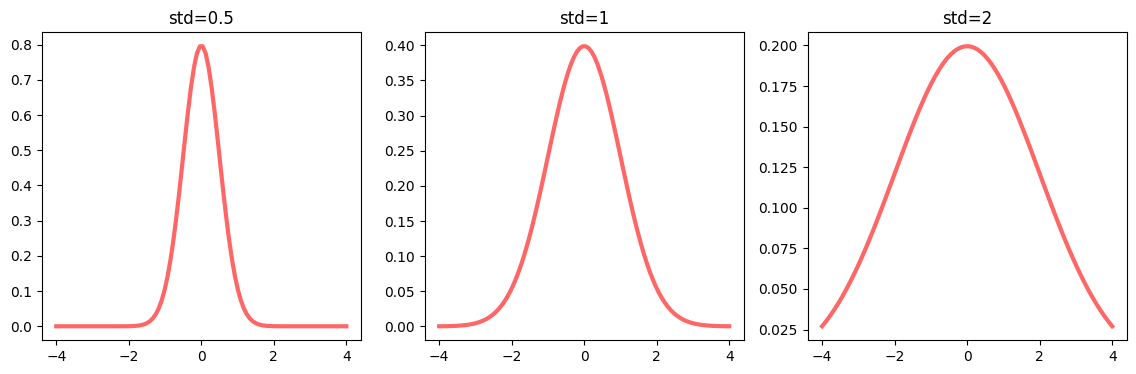

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
# plt.figure()
_, axes = plt.subplots(1, 3, figsize=(14,4))

x = np.linspace(-4,4, 100)
for i,s  in enumerate([1/2,1,2]):
    axes[i].plot(x, norm.pdf(x, 0,s),'r-', lw=3, alpha=0.6, label='norm pdf')
    axes[i].set_title(f'std={s}')
    

### Algorithm

For each relevant feature $\Large{j}$ of of $\Large{n}$
1. Compute parameters $\mu_{1},\mu_{2}..., \mu_{n},\quad \sigma_{1},\sigma_{2}..., \sigma_{n}, $ of Gaussian distribution that associates with this feature
$$ \Large{\mu_{j} =\frac{1}{m} \sum_{i=1}^{m}{x_{j}^{(i)}}},  \quad
\Large{\sigma_{j}^2 =\frac{1}{m} \sum_{i=1}^{m}{(x_{j}^{(i)}-\mu_{j})^2}}, $$ 
$\Large{m} $ - number of observations 
2. Being based on estimated Normal distribution, compute probabiliies of every record  

$$ \Large{p(x) = \prod_{j=1}^{n}{p_{j}}  = \prod_{j=1}^{n}{p(x_{j}|\mu_{j},\sigma_{j}})}  =
\prod_{j=1}^{n}{\frac{1}{\sigma_j\sqrt{2 \pi}}} e^ {- \Large {\frac{(x_j-\mu_j)^2}{2\sigma_j^2}}}$$ 
3. Evaluate model by selecting $\Large{\epsilon}$ that has best metric (e.g.f1-score) on validation set 
<br>**Note**: You may define ${\epsilon}$ manually observing the amount of outliers on training set 
<br><br>4. Mark record as anomaly if $$\Large{p(x) < \epsilon}$$ 

## Multivariate Gaussian Distribution

This resolves the case when the anomaly cannot be captured by analyzing features separately 

### Example of drawback of using product of probabilities of each feature 

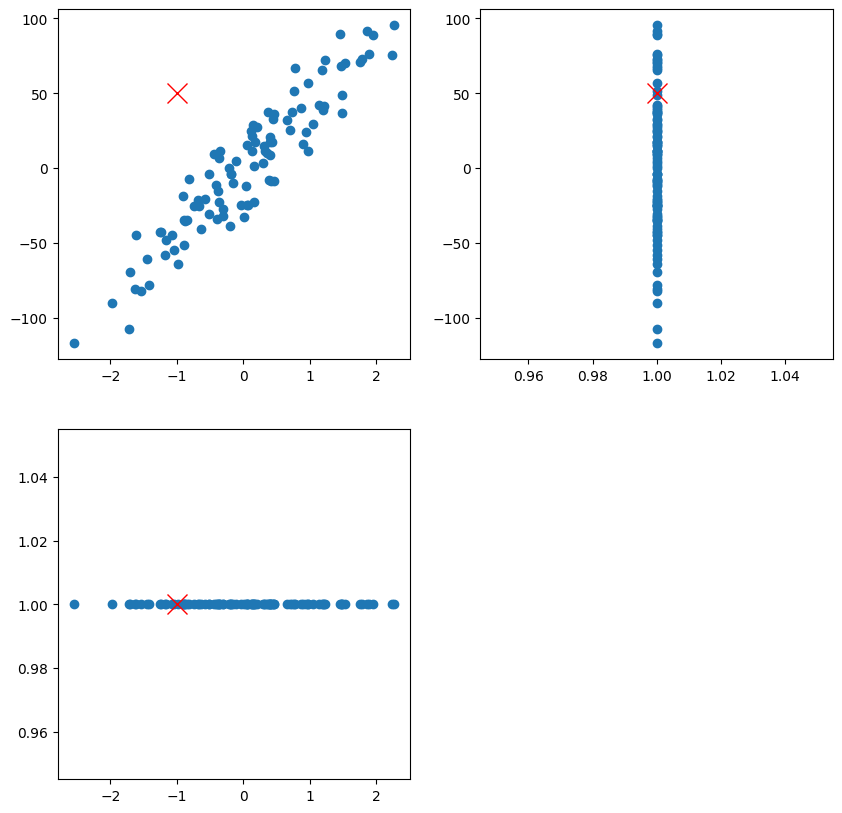

In [4]:
np.random.seed(0)
from sklearn.datasets import make_regression
X_R1, y_R1 =  make_regression(
        n_samples = 100,
        n_features=1,
        n_informative=1,
        bias = 0,
        noise = 15, 
        )

# _, subaxes = plt.subplots(2, 2, figsize=(5,20))
plt.figure (figsize=(10,10))
ax = plt.subplot(2,2,1)
ax.scatter(X_R1, y_R1)
ax.plot (-1, 50, 'rx', markersize= '15')
ax = plt.subplot(2,2,3)
ax.scatter( X_R1,[1]*len(X_R1))
ax.plot (-1,1,'rx', markersize= '15')
ax = plt.subplot(2,2,2)
ax.scatter([1]*len(y_R1), y_R1)
ax.plot (1,50,'rx', markersize= '15')


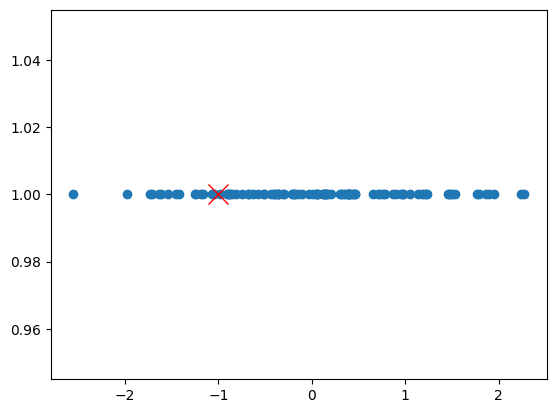

In [5]:
plt.scatter( X_R1,[1]*len(X_R1))
plt.plot (-1,1,'rx', markersize= '15')

### Approach 

Instead of computing separately $\Large{p_1,p_2,...p_n}$ compute parameters of multi variate gaussian distribution
 $\Large {\mu \in \mathbb{R}^n,\quad \Sigma \in \mathbb{R}^{(n \times n)}} $:

<font size="5">
$$ p(x|\mu,\Sigma)  =
\frac{1}{\sqrt{(2 \pi)^n  |\Sigma|}}e^ {\large{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)}} $$ 

$$ \mu =\frac{1}{m} \sum_{i=1}^{m}{x^{(i)}},  \quad
\Sigma =\frac{1}{m} \sum_{i=1}^{m}{(x^{(i)}-\mu)(x^{(i)}-\mu)^T} $$ 
   

</font>






<img src = "img/multivariate_0.png" height=180 width= 180 align="left">
<img src = "img/multivariate_1.png" height=180 width= 180 align="left">
<img src = "img/multivariate_2.png" height=180 width= 180 align="left">
<img src = "img/multivariate_3.png" height=180 width= 180 align="left">
<img src = "img/multivariate_4.png" height=180 width= 180 align="left">

<img src = "img/multivariate_5.png" height=180 width= 180 align="left">
<img src = "img/multivariate_6.png" height=180 width= 180 align="left">
<img src = "img/multivariate_7.png" height=180 width= 180 align="left">
<img src = "img/multivariate_8.png" height=180 width= 180 align="left">
<img src = "img/multivariate_9.png" height=180 width= 180 align="left">

## Implementation
### Add outlier to dataset

In [6]:
np.c_[X_R1, y_R1]
outlier= np.array([-1,50]).reshape(1,-1)
X= np.r_[np.c_[X_R1, y_R1], outlier]
X_demo= X.copy()
X[-5:, :]

array([[ -0.36274117,   6.9858613 ],
       [  0.3563664 ,  10.12431371],
       [ -1.61389785, -44.94433636],
       [ -1.18063218, -58.10920047],
       [ -1.        ,  50.        ]])

### Associate normal distribution for each feature

In [7]:
mu = np.zeros(X.shape[1])
std= np.zeros(X.shape[1])
p = np.zeros(X.shape)
for i in range (X.shape[1]):
    mu[i]=  X[:,i].mean()
    std[i]= X[:,i].std()
    p[:,i]= norm.pdf(X[:,i], mu[i], std[i])

print  ('np.shape=', p.shape)
print  ('p[:5,:]=\n', p[:5,:])

np.shape= (101, 2)
p[:5,:]=
 [[0.36441359 0.00755979]
 [0.25920703 0.00849273]
 [0.37211799 0.00857603]
 [0.27443505 0.00850763]
 [0.25689405 0.0063255 ]]


### Compute probability for each reacord of dataset using assiciated normal distribution

In [8]:
p_anomaly = np.prod(p, axis=1)
print  ('p_anomaly.shape=', p_anomaly.shape)
print  ('p_anomaly[:5]=\n', p_anomaly[:5])

p_anomaly.shape= (101,)
p_anomaly[:5]=
 [0.00275489 0.00220138 0.00319129 0.00233479 0.00162498]


### Label outliers 

In [9]:
import pandas as pd 

In [10]:
def get_anomalies(p_anomaly):
    res = []
    for eps in np.linspace(p_anomaly.min(), p_anomaly.max(), 100):
        anomalies= np.where (p_anomaly< eps)[0] # it returns tuple thus it requires to take first element or use 
        regular= np.where (p_anomaly>=eps)[0]
        n_anomalies= len(p_anomaly[anomalies])
        res.append([eps,n_anomalies, anomalies, regular])
    df = pd.DataFrame(res, columns = ['eps', 'n_anomalies', 'anomalies', 'regular']).head(10)
    return df
df = get_anomalies(p_anomaly)
df


,eps,n_anomalies,anomalies,regular
0,0.000004,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,0.000039,2,"[64, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,0.000073,4,"[57, 63, 64, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,0.000108,7,"[26, 43, 57, 63, 64, 69, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,0.000142,7,"[26, 43, 57, 63, 64, 69, 70]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,0.000177,9,"[21, 26, 43, 57, 63, 64, 69, 70, 75]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,0.000211,11,"[12, 18, 21, 26, 43, 57, 63, 64, 69, 70, 75]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
7,0.000245,13,"[12, 17, 18, 21, 26, 42, 43, 57, 63, 64, 69, 7...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
8,0.000280,15,"[12, 17, 18, 21, 26, 42, 43, 48, 51, 57, 63, 6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."
9,0.000314,15,"[12, 17, 18, 21, 26, 42, 43, 48, 51, 57, 63, 6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,..."


### Visualize outliers 

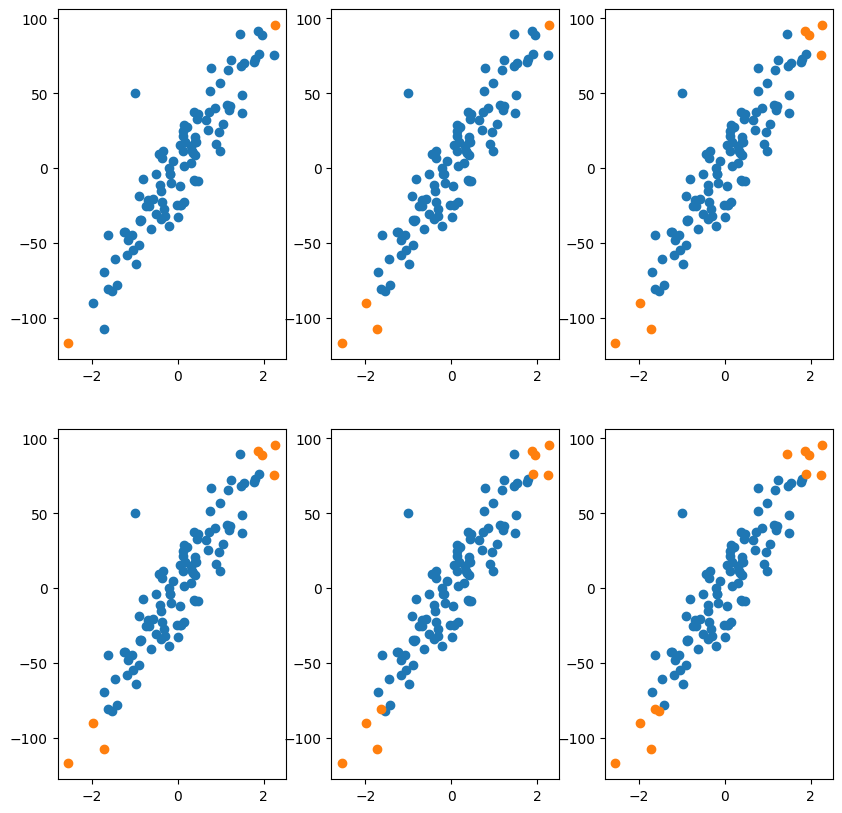

In [11]:
plt.figure (figsize=(10,10))
for i in range (1,7): # skip case of no outliers 
    ax = plt.subplot(2,3,i)
#     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i,3]]
    ax.scatter(regulars[:,0],regulars[:,1])
    outliers = X[df.iloc[i,2]]
    ax.scatter (outliers[:,0],outliers[:,1])# ,marker='x',s=80, c='r',alpha=0.6)


#### Note: It does not capture the multi-feature outlier `[-1,50]`

### Implement anomaly detection using multivariate normal distribution 

In [12]:
mu_mv= X.mean(axis=0)
print ('mu_mv.shape=',mu_mv.shape)
m = X.shape[0]
def compute_sigma_mv(x):
    res = np.zeros((x.shape[1],x.shape[1]))
    for i in range(x.shape[0]):
        res += x[i,:].reshape(1,-1).T * x[i,:].reshape(1,-1)
    return res/     x.shape[0]
sigma_mv= compute_sigma_mv(X)
print ('sigma_mv.shape=',sigma_mv.shape)
print ('sigma_mv:\n',sigma_mv)


# probably this may or even should be used: 
print ('\nUsing np.cov to compare')
cov = np.cov((X-mu_mv),rowvar= False ) # If `rowvar` is True (default), then each row represents a    variable, with observations in the columns. Otherwise, the relationshipis transposed: each column rep
print ('cov.shape=',sigma_mv.shape)
cov


mu_mv.shape= (2,)
sigma_mv.shape= (2, 2)
sigma_mv:
 [[1.01921150e+00 4.25669225e+01]
 [4.25669225e+01 2.11779435e+03]]

Using np.cov to compare
cov.shape= (2, 2)


array([[1.02694734e+00, 4.29021135e+01],
       [4.29021135e+01, 2.13563948e+03]])

In [13]:
from scipy.stats import multivariate_normal 
p_mutlivar = multivariate_normal.pdf(X, mean=mu, cov=sigma_mv)
p_mutlivar

array([7.32060364e-03, 1.59560375e-03, 7.36230802e-03, 2.04418700e-03,
       5.50279300e-03, 5.86585149e-03, 2.38708072e-03, 7.96669909e-03,
       4.88078208e-03, 6.09290973e-03, 6.54114672e-03, 8.05490917e-03,
       1.56514265e-03, 5.06760783e-03, 6.87591362e-03, 3.03494102e-03,
       8.14949513e-03, 1.94178330e-03, 9.34509674e-04, 6.02413809e-03,
       3.78395620e-03, 1.58511410e-03, 2.35872965e-03, 8.22417733e-03,
       3.68425653e-03, 1.08900060e-03, 1.33086711e-03, 8.17210944e-03,
       2.89893362e-03, 2.72429053e-03, 4.22506090e-03, 6.89622629e-03,
       4.04640084e-03, 3.94051606e-03, 1.71805342e-03, 5.07050776e-03,
       3.85836044e-03, 7.32857007e-03, 3.10693078e-03, 3.19556193e-03,
       3.80911753e-03, 8.02887119e-03, 1.87218183e-03, 5.15940517e-04,
       7.29495456e-03, 2.25448838e-03, 2.23187639e-03, 5.71142667e-03,
       2.00531909e-03, 3.04802907e-03, 3.07127232e-03, 1.80768102e-03,
       2.48395536e-03, 3.03827215e-03, 4.61302591e-03, 7.84547704e-03,
      

In [14]:
df = get_anomalies(p_mutlivar)
df

,eps,n_anomalies,anomalies,regular
0,1.953708e-08,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,8.358520e-05,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,1.671509e-04,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,2.507165e-04,1,[100],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,3.342822e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,4.178478e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,5.014135e-04,3,"[57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,5.849792e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,6.685448e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,7.521105e-04,4,"[43, 57, 64, 100]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


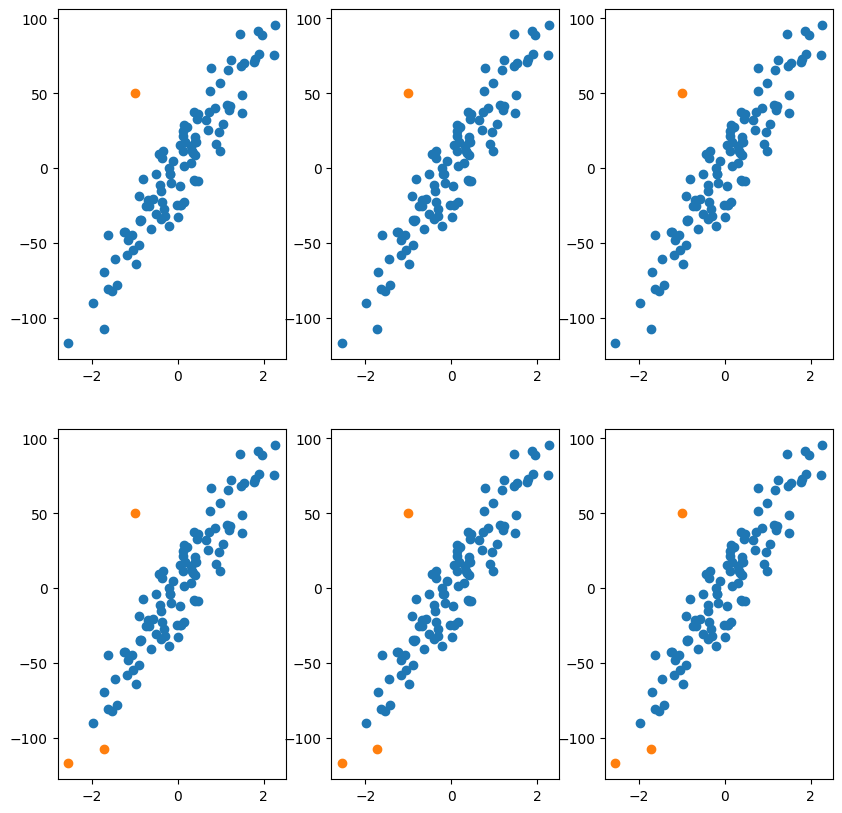

In [15]:
plt.figure (figsize=(10,10))
for i in range (1,7): # skip case of no outliers 
    ax = plt.subplot(2,3,i)
#     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i,3]]
    ax.scatter(regulars[:,0],regulars[:,1])
    outliers = X[df.iloc[i,2]]
    ax.scatter (outliers[:,0],outliers[:,1])# ,marker='x',s=80, c='r',alpha=0.6)


#### Now it detects multifeature outliers 

## Sklearn: EllipticEnvelope

Implementation of Multivariate Gaussian Distribution

In [16]:
from sklearn.covariance import EllipticEnvelope
help(EllipticEnvelope)

Help on class EllipticEnvelope in module sklearn.covariance._elliptic_envelope:

class EllipticEnvelope(sklearn.base.OutlierMixin, sklearn.covariance._robust_covariance.MinCovDet)
 |  EllipticEnvelope(*, store_precision=True, assume_centered=False, support_fraction=None, contamination=0.1, random_state=None)
 |  
 |  An object for detecting outliers in a Gaussian distributed dataset.
 |  
 |  Read more in the :ref:`User Guide <outlier_detection>`.
 |  
 |  Parameters
 |  ----------
 |  store_precision : bool, default=True
 |      Specify if the estimated precision is stored.
 |  
 |  assume_centered : bool, default=False
 |      If True, the support of robust location and covariance estimates
 |      is computed, and a covariance estimate is recomputed from it,
 |      without centering the data.
 |      Useful to work with data whose mean is significantly equal to
 |      zero but is not exactly zero.
 |      If False, the robust location and covariance are directly computed
 |      w

### Default outliers_fraction = 0.1

In [17]:
algorithm = EllipticEnvelope(random_state=2021).fit(X)
y_pred = algorithm.predict(X)
y_pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1])

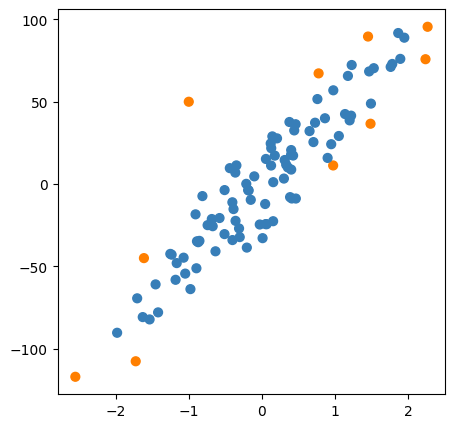

In [18]:

plt.figure (figsize=(5,5))
colors = np.array(['#377eb8' , '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred - 1) // 2])


### Review  for various outliers_fraction values 

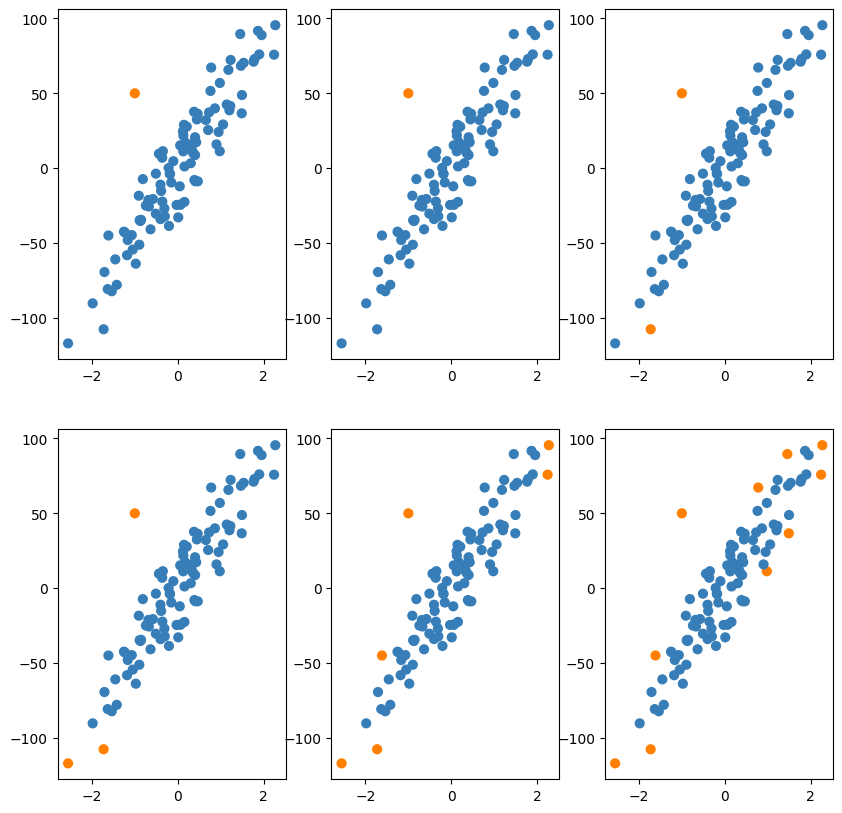

In [19]:
plt.figure (figsize=(10,10))

outliers_fraction= [.007, .01,.02, .03, .05, .1]
for i, of in  enumerate (outliers_fraction):  

    ax = plt.subplot(2,3,i+1)

    algorithm = EllipticEnvelope(contamination=of, random_state=2021).fit(X)
    y_pred = algorithm.predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred -1) // 2])
    


## Sample of manual labeling outliers being based on $\Large{\epsilon}$

Selected $\Large{\epsilon}=0.03$ being based on rapid change of amount of outliers and corresponding rapid change of the business related feature `ratio_min`:
<img src = "img/sanity_check_sample.png"  align="left">




## Other algorithms 


For each dataset, 15% of samples are generated as random uniform noise. This
proportion is the value given to the nu parameter of the OneClassSVM and the
contamination parameter of the other outlier detection algorithms.
Decision boundaries between inliers and outliers are displayed in black
except for Local Outlier Factor (LOF) as it has no predict method to be applied
on new data when it is used for outlier detection.

- `sklearn.svm.OneClassSVM` is known to be sensitive to outliers and
thus does not perform very well for outlier detection. This estimator is best
suited for novelty detection when the training set is not contaminated by
outliers. That said, outlier detection in high-dimension, or without any
assumptions on the distribution of the inlying data is very challenging, and a
One-class SVM might give useful results in these situations depending on the
value of its hyperparameters.

- `sklearn.covariance.EllipticEnvelope` assumes the data is Gaussian and
learns an ellipse. It thus degrades when the data is not unimodal. Notice
however that this estimator is robust to outliers.

- `sklearn.ensemble.IsolationForest` and `sklearn.neighbors.LocalOutlierFactor` seem to perform reasonably well
for multi-modal data sets. The advantage of
`sklearn.neighbors.LocalOutlierFactor` over the other estimators is
shown for the third data set, where the two modes have different densities.
This advantage is explained by the local aspect of LOF, meaning that it only
compares the score of abnormality of one sample with the scores of its
neighbors.

While these examples give some intuition about the algorithms, this
intuition might not apply to very high dimensional data.

Finally, note that parameters of the models have been here handpicked but
that in practice they need to be adjusted. In the absence of labelled data,
the problem is completely unsupervised so model selection can be a challenge.


## Generate datasets

In [20]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers


In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

In [22]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))]


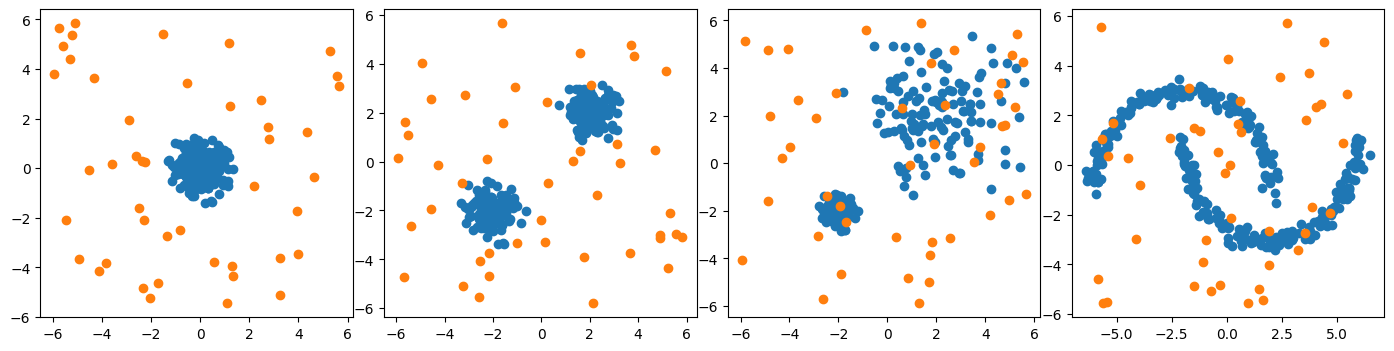

In [23]:
rng = np.random.RandomState(42)

_, subaxes = plt.subplots(1, 4, figsize=(14,4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets ):
    outliers =rng.uniform(low=-6, high=6,size=(n_outliers, 2))
    ax.scatter(X[:,0],X[:,1])
    ax.scatter(outliers[:,0],outliers[:,1])



In [24]:
len(datasets)

4

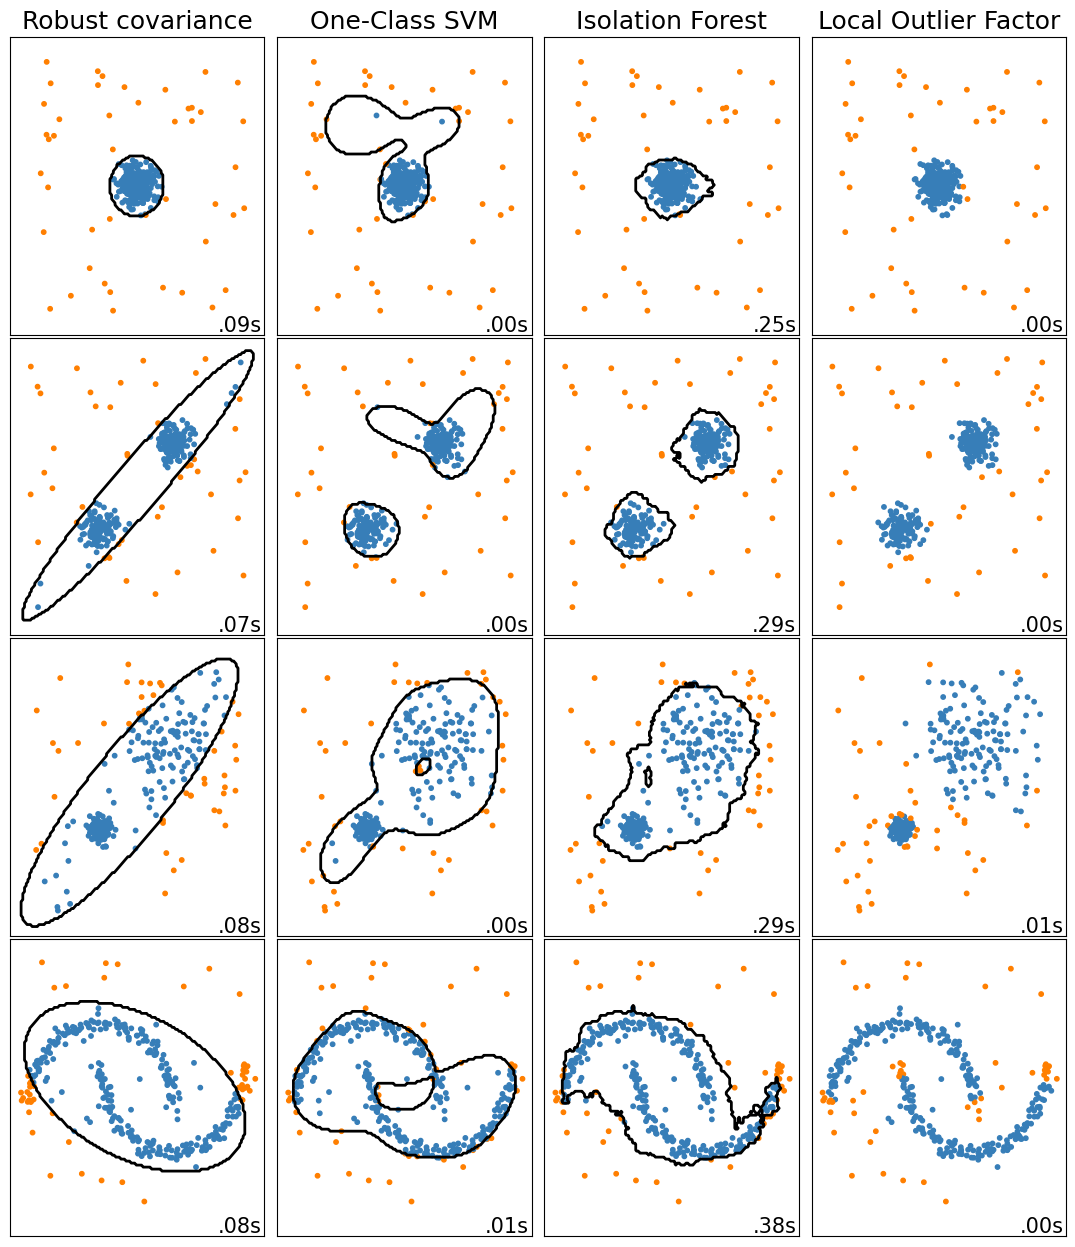

In [25]:

import time


# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Use meshgrid data to draw the decision bondary
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

#         plot the decision bondary
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')


        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred - 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1



## How to classify  unseen data if algorithm supports only fit 

Let's show on DBSCAN algorithm 

### Recall DBSCAN

Here we will instantiate DBSCAN with a ε-neighbourhood length of 0.05, and 5 to be the minimum number of samples required for an instance to be considered a core instance

In [26]:
from sklearn.cluster import DBSCAN 

In [27]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [28]:

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X= scaler.fit_transform(X_demo)

from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
set(dbscan.labels_)

{-1, 0}

#### Note: `-1` are the outliers

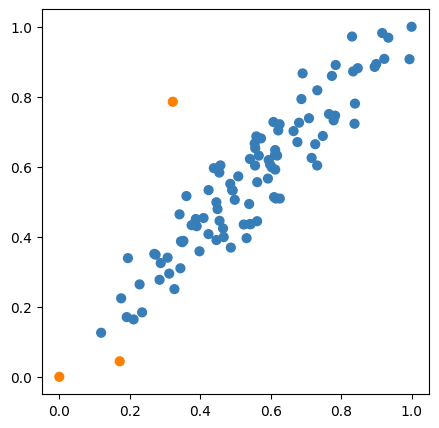

In [29]:
plt.figure (figsize=(5,5))
outliers= np.where(dbscan.labels_==-1, 1,0)
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[outliers])

### Review DBSCAN for other datasets

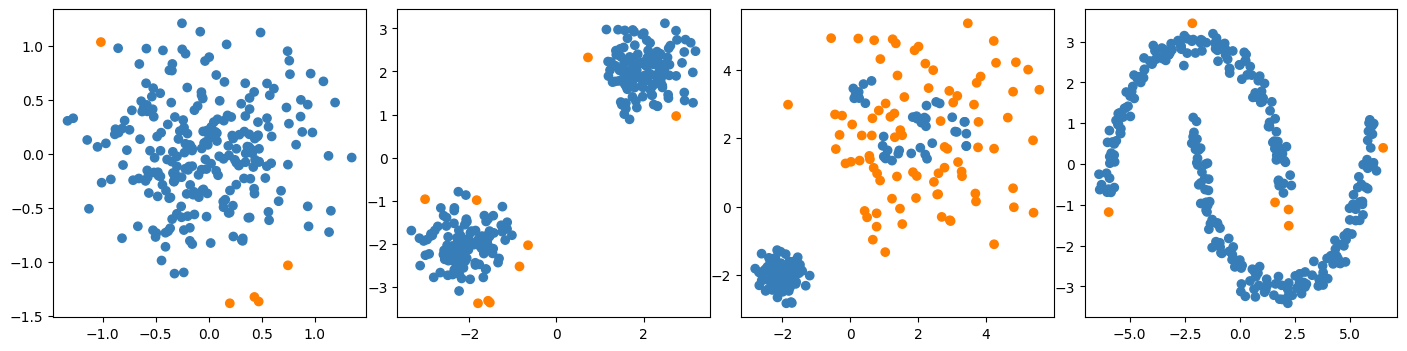

In [30]:
_, subaxes = plt.subplots(1, 4, figsize=(14,4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets):
    dbscan = DBSCAN(eps=0.4, min_samples=5).fit(X)
    outliers= np.where(dbscan.labels_==-1, 1,0)    
    ax.scatter(X[:,0],X[:,1], color=colors[outliers])



### Predict using DBSCAN

**Note**: The DBSCAN does not have a predict method, 
only a fit_predict method, meaning that it can’t cluster new instances. 

Instead, we can use a different classifier to train and predict on. For this example, let’s use a KNN

In [31]:
X= datasets[3]

from sklearn.cluster import DBSCAN 
eps_target=0.4
dbscan = DBSCAN(eps=eps_target).fit(X)

set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4}

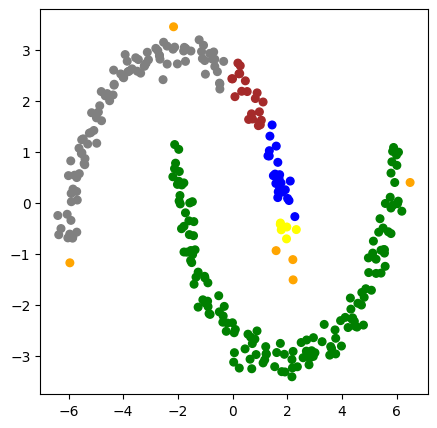

In [32]:
plt.figure (figsize=(5,5))
colors6 = np.array(['green','blue','grey', 'brown', 'yellow', 'orange'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# core_sample_indices_ : array, shape = [n_core_samples] Indices of core samples.
# components_ : array, shape = [n_core_samples, n_features] Copy of each core sample found by training.

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 1.5], [1, -0.1], [1.8, 1], [-3, -2], [-3,2.5]])
prediction= knn.predict(X_new)
prediction



array([0, 3, 1, 1, 0, 2], dtype=int64)

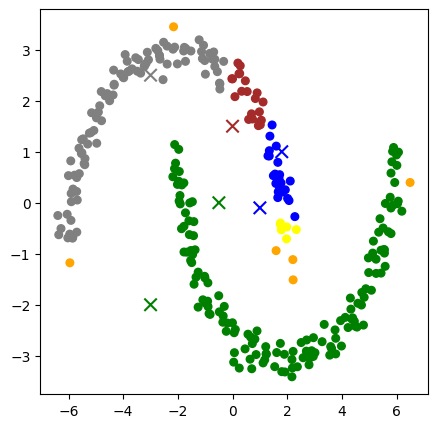

In [34]:
plt.figure (figsize=(5,5))
colors6 = np.array(['green','blue','grey', 'brown', 'yellow', 'orange'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])
plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker= 'x', color=colors6[prediction])

**Note**: However, we run into one problem: 
<br>we have given the KNN data without any outliers. 
<br>This is problematic, as it will force KNN to choose a cluster for new instances, even if the new instance is indeed an outlier.
To combat this, we leverage the kneighbors method of the KNN classifier, which, given a set of instances, returns the **distances and indices** of the k nearest neighbours of the training set. 
<br>We can then set a maximum distance, and if an instance exceeds that distance, we qualify it as an outlier


### Sanity Check 
Check the existing outliers are marked as outliers by KNN 

In [35]:
outliers= X[dbscan.labels_==-1]
outliers

array([[-2.1580194 ,  3.44934436],
       [ 1.59316275, -0.9392648 ],
       [ 6.49575728,  0.39698968],
       [-5.95157641, -1.17774405],
       [ 2.21563946, -1.51183693],
       [ 2.2059929 , -1.11491072]])

In [36]:
y_dist, y_pred_idx = knn.kneighbors(outliers, n_neighbors=1)
y_dist

array([[0.40107031],
       [0.4460994 ],
       [0.56248591],
       [0.49336127],
       [0.83885328],
       [0.46773822]])

In [37]:
y_dist>eps_target

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Classify unseen data 

In [38]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_dist

array([[0.97074366],
       [0.73502134],
       [0.68489718],
       [0.22924926],
       [1.60185068],
       [0.28373858]])

In [39]:
new_y_pred = np.where(y_dist > eps_target, 1, 0).ravel()
new_y_pred
# y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# y_pred
# y_pred[y_dist > 0.6] = -1
# y_pred.ravel()

array([1, 1, 1, 0, 1, 0])

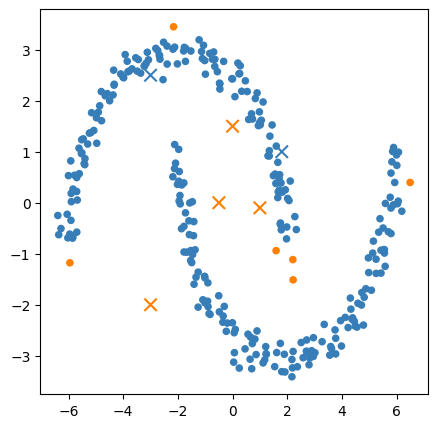

In [40]:
plt.figure (figsize=(5,5))
outliers= np.where(dbscan.labels_==-1, 1,0)
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[outliers])

plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker= 'x', color=colors[new_y_pred])

## Visual method to detect outliers 

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X = np.array([45,56,78,34,1,2,67,68,87,203,-200,-150])

# from  scipy import stats
# stats.describe(X)

pd.DataFrame(X).iloc[:,0].describe()

count     12.000000
mean      24.250000
std      106.915536
min     -200.000000
25%        1.750000
50%       50.500000
75%       70.500000
max      203.000000
Name: 0, dtype: float64

<Axes: >

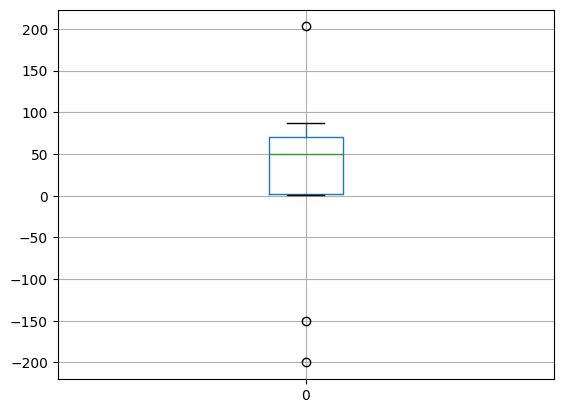

In [42]:
pd.DataFrame(X).boxplot()

<Axes: >

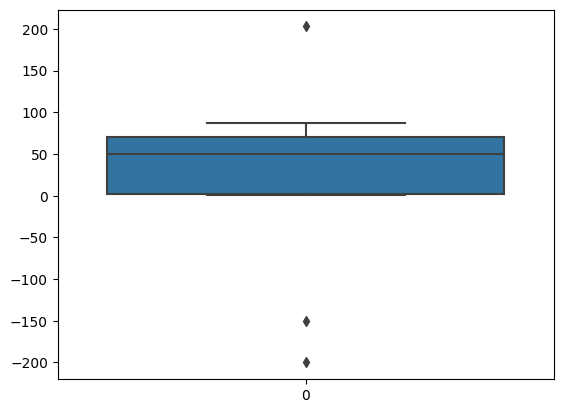

In [43]:
sns.boxplot(X)

#### Remove outliers : `X < 150) & (X > -50)`


<Axes: >

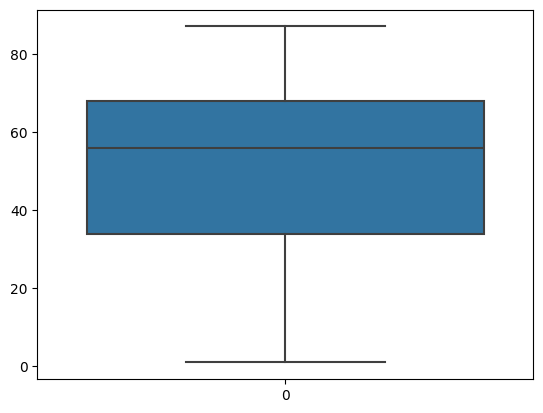

In [44]:
X = X[(X < 150) & (X > -50)]
sns.boxplot(X)


### Sample from data science test task 

count    1.882400e+04
mean     1.783432e+05
std      6.445703e+05
min      7.499500e+03
25%      5.980000e+04
50%      9.047500e+04
75%      1.341625e+05
max      6.246806e+06
Name: price, dtype: float64


<Axes: >

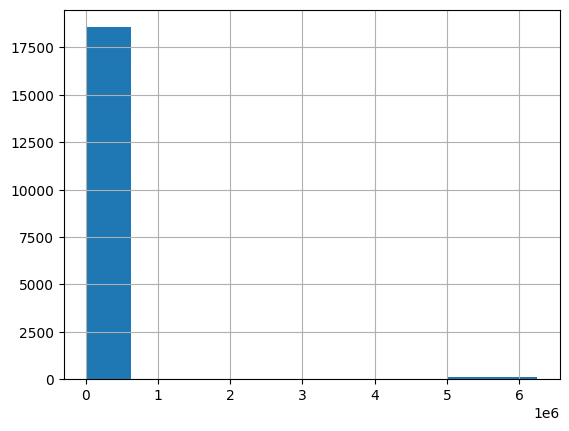

In [45]:
df= pd.read_csv('data_housing.csv', index_col=0)
col= 'price'
print (df[col].describe())
df[col].hist()

<Axes: >

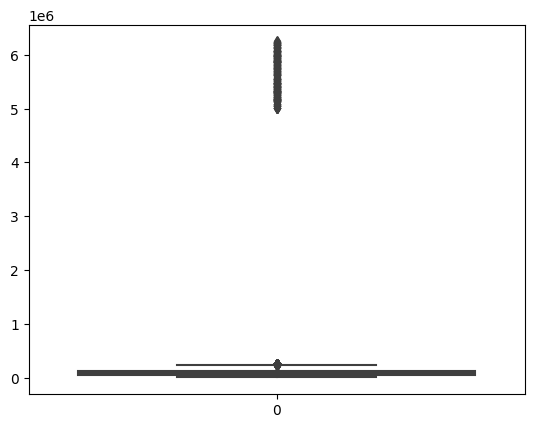

In [46]:
sns.boxplot(df[col])

#### Remove outliers : `price > 1e6`

<Axes: >

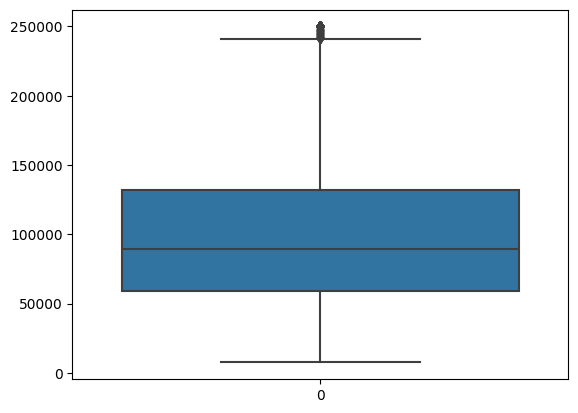

In [47]:
sns.boxplot(df[df[col]<1e6][col])

### Label outliers being based on quartiles 

 <img src = "img/quartiles.png" height=500 width= 500 align="left">

#### Usually all records beyound inetrval $\mu - 3\sigma < x < \mu + 3\sigma$ could be considered as outliers 

<Axes: >

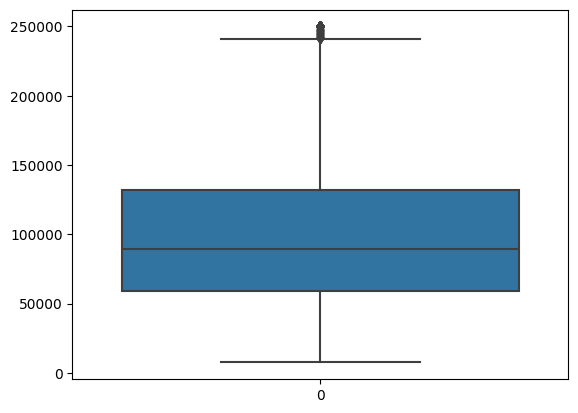

In [48]:
col_mean= df[col].mean()
col_std= df[col].std()
sns.boxplot(df[df[col] < col_mean +3 * col_std][col])

#### Note: 
Depending on domain knowledge  you may scoose another range e.g. $ |x- \mu| >  10 *\sigma$  to label records as outliers 

### Hometask:

In [49]:
import pandas as pd
import re
import seaborn as sns


In [50]:
def load_data():
    df= pd.read_csv('data_housing.csv', index_col=0)
    return df
df = load_data()
df.head()

,rent,dist,nrooms,age,size,noccup,price
0,624,17.0,2.0,age:41,52,3,226300.0
1,622,17.0,2.0,21,43,3,NaN
2,544,NaN,2.0,52,57,3,176050.0
3,'423',17.0,2.0,age:52,51,3,170650.0
4,288,to center = 17,2.0,52,44,3,171100.0


In [51]:
def fill_nan(df):
    for col in df.columns:
        try:
            # fill with mean
            col_mean= df[col].mean()
            df[col].fillna(col_mean, inplace=True)
        except:
            # fill with zero
            df[col].fillna(0, inplace=True)
    return df
df = fill_nan(df)
df.any().isnull()

rent      False
dist      False
nrooms    False
age       False
size      False
noccup    False
price     False
dtype: bool

In [52]:
df.head()

,rent,dist,nrooms,age,size,noccup,price
0,624,17.0,2.0,age:41,52,3,226300.00000
1,622,17.0,2.0,21,43,3,178343.23045
2,544,0,2.0,52,57,3,176050.00000
3,'423',17.0,2.0,age:52,51,3,170650.00000
4,288,to center = 17,2.0,52,44,3,171100.00000


In [53]:
def str_to_num(df):
    # extract number from string and replace string with number
    for col in df.columns:
        for cell in df[col]:
            # if cell is not object
            if type(cell) != str:
                continue
            try:
                # try to extract digits
                num = re.findall(r'\d+', cell)[0]
                df[col].replace(cell, int(num), inplace=True)
            except:
                # if no digits found replace with zero
                df[col].replace(cell, 0, inplace=True)
    df = df.astype(int)
    return df
df = str_to_num(df)
df.head()

,rent,dist,nrooms,age,size,noccup,price
0,624,17,2,41,52,3,226300
1,622,17,2,21,43,3,178343
2,544,0,2,52,57,3,176050
3,423,17,2,52,51,3,170650
4,288,17,2,52,44,3,171100


In [54]:
print(df['price'].describe())  



count    2.063000e+04
mean     1.783432e+05
std      6.157092e+05
min      7.499000e+03
25%      6.330000e+04
50%      9.630000e+04
75%      1.578000e+05
max      6.246806e+06
Name: price, dtype: float64


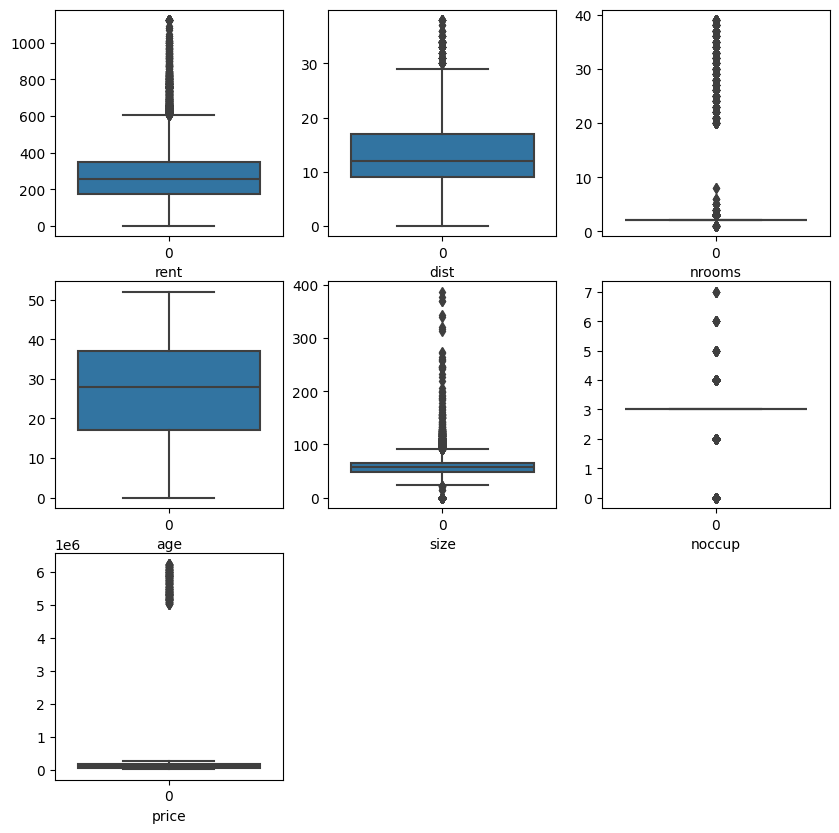

In [55]:
# boxplot price column
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    # label the axes
    plt.xlabel(col)
    sns.boxplot(df[col])

In [56]:
print(df['nrooms'].describe())
print(df['nrooms'].value_counts())

count    20630.000000
mean         3.406205
std          6.083300
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         39.000000
Name: nrooms, dtype: float64
nrooms
2     18262
3      1228
1        80
37       74
30       63
21       61
33       58
25       58
38       57
24       54
28       53
39       51
32       50
35       49
20       49
29       45
31       44
23       43
36       43
26       43
4        42
22       37
34       34
27       34
5        13
6         3
8         2
Name: count, dtype: int64


In [140]:
from sklearn.covariance import EllipticEnvelope
clf =  EllipticEnvelope(contamination=.07, random_state=2023)

y_pred = clf.fit_predict(df)
# count of -1
n_outliers = sum(y_pred == -1)
print('Number of outliers:', n_outliers)


new_df =   df[(y_pred == 1)]


print(new_df['nrooms'].value_counts())



Number of outliers: 1445
nrooms
2    17872
3     1190
1       77
4       36
5       10
Name: count, dtype: int64


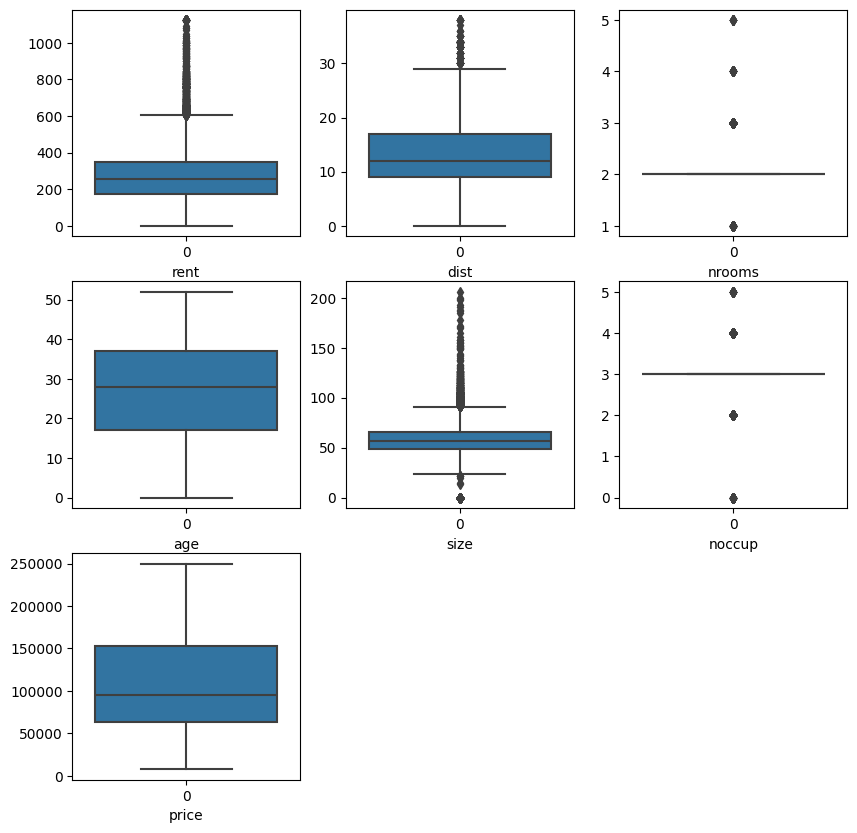

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# draw boxplot for each column
for i, col in enumerate(new_df.columns):
    plt.subplot(3, 3, i+1)
    # label the axes
    plt.xlabel(col)
    # remove 0 values
    sns.boxplot(new_df[col])

In [156]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('price', axis=1), new_df['price'], random_state=2023)
print(X_train.shape, X_test.shape)
clf = XGBRegressor(use_label_encoder=False, eval_metric= 'logloss', random_state=2023)
clf.fit(X_train, y_train)

# print accuracy
print('Train accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))





(14388, 6) (4797, 6)
Train accuracy: 0.7162321331765409
Test accuracy: 0.50596174018044
